<a href="https://colab.research.google.com/github/Tarunparkar/ML/blob/main/ML_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries (only if not preinstalled)
!pip install matplotlib seaborn scikit-learn --quiet


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [ ]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Convert to DataFrame for clarity
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Applying PCA

In [ ]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for visualization
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.72962445 0.22850762]


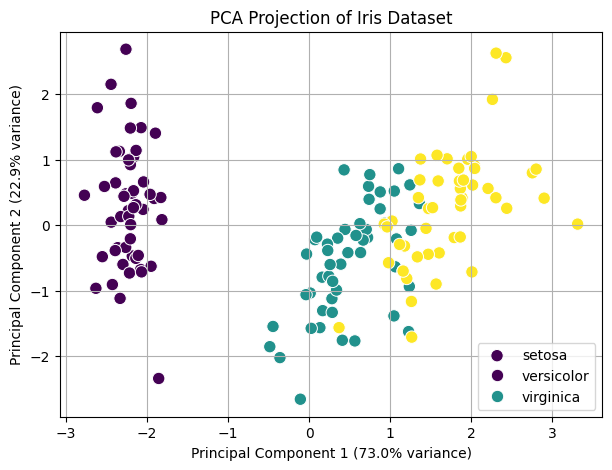

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='PC1', y='PC2', hue='target',
    data=df_pca, palette='viridis', s=80
)
plt.title('PCA Projection of Iris Dataset')
plt.xlabel(f"Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.legend(target_names)
plt.grid(True)
plt.show()


Applying T-sne

In [ ]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Combine results
df_tsne = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])
df_tsne['target'] = y


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


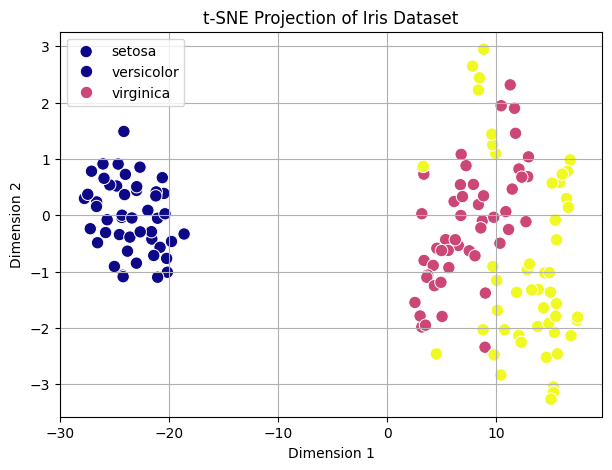

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='Dim1', y='Dim2', hue='target',
    data=df_tsne, palette='plasma', s=80
)
plt.title('t-SNE Projection of Iris Dataset')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(target_names)
plt.grid(True)
plt.show()


Comparision

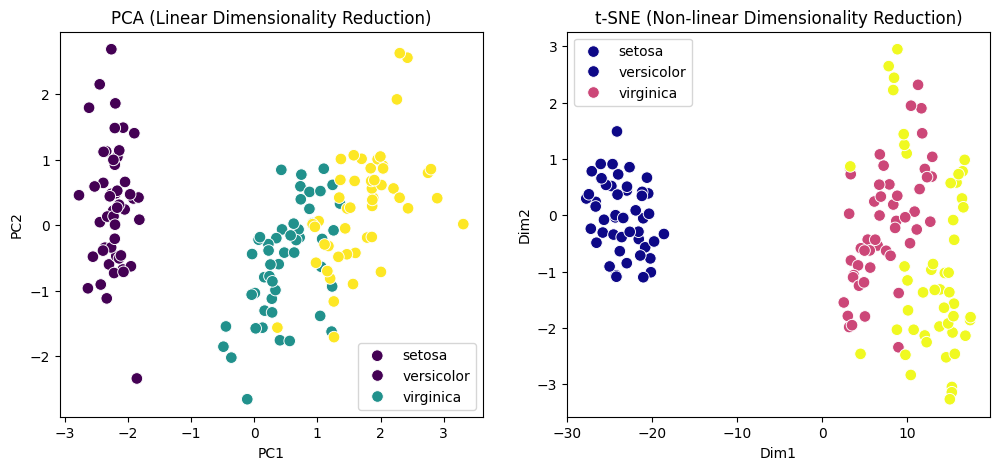

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# PCA plot
sns.scatterplot(ax=axes[0], x='PC1', y='PC2', hue='target', data=df_pca, palette='viridis', s=70)
axes[0].set_title("PCA (Linear Dimensionality Reduction)")
axes[0].legend(target_names)

# t-SNE plot
sns.scatterplot(ax=axes[1], x='Dim1', y='Dim2', hue='target', data=df_tsne, palette='plasma', s=70)
axes[1].set_title("t-SNE (Non-linear Dimensionality Reduction)")
axes[1].legend(target_names)

plt.show()
